In [1]:
from Yugiquery import *
header()

<div align='center'>
    <br>
    <pre>
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
     - Last modified: 08/12/2022 21:57 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

# Preamble

## Lists

In [2]:
# API variables
api_url = 'https://yugipedia.com/api.php'

## Formatting functions

In [3]:
def concat_errata(row):
    result = tuple()
    if row['Name errata']:
        result += ('Name',)
    if row['Type errata']:
        result += ('Type',)
    if result == tuple():
        return np.nan
    else:
        return result

## API call functions

In [4]:
# Name errata query
def fetch_name_errata():
    name_query = '[[Category:Cards%20with%20name%20errata]]|limit=1000|order%3Dasc&format=json'
    name_query_df = pd.read_json(f'{api_url}?action=ask&query={name_query}')
    name_keys = list(name_query_df['query']['results'].keys())
    return pd.DataFrame(True, index = [i.split(':')[1].strip() for i in name_keys if 'Card Errata:' in i], columns = ['Name errata'])

# Type errata query
def fetch_type_errata():
    type_query = '[[Category:Cards%20with%20card%20type%20errata]]|limit=1000|order%3Dasc&format=json'
    type_query_df = pd.read_json(f'{api_url}?action=ask&query={type_query}')
    type_keys = list(type_query_df['query']['results'].keys())
    return pd.DataFrame(True, index = [i.split(':')[1].strip() for i in type_keys if 'Card Errata:' in i], columns = ['Type errata'])

# Data aquisition

## Fetch online data

In [5]:
timestamp = pd.Timestamp.now().timestamp()
name_df = fetch_name_errata()
type_df = fetch_type_errata()

## Merge data frames

In [6]:
# Merged data frame
errata_df = pd.concat([name_df, type_df], axis = 1).fillna(False).sort_index()
errata_df

,Name errata,Type errata
"""A"" Cell Breeding Device",True,False
7 Completed,False,True
A Deal with Dark Ruler,True,True
A Legendary Ocean,False,True
A Wingbeat of Giant Dragon,False,True
...,...,...
Yellow Gadget,False,True
Yomi Ship,False,True
Z-Metal Tank,False,True
Zaborg the Thunder Monarch,False,True


# Venn diagram

In [7]:
name_only = sum(errata_df['Name errata'] & ~errata_df['Type errata'])
type_only = sum(errata_df['Type errata'] & ~errata_df['Name errata'])
both = sum(errata_df['Name errata'] & errata_df['Type errata'])

In [8]:
print('Total number of cards with errata:', len(errata_df))
print('Total number of cards with only name errata:', name_only)
print('Total number of cards with only type errata:', type_only)
print('Total number of cards with name and type errata:', both)

Total number of cards with errata: 1151
Total number of cards with only name errata: 433
Total number of cards with only type errata: 619
Total number of cards with name and type errata: 99


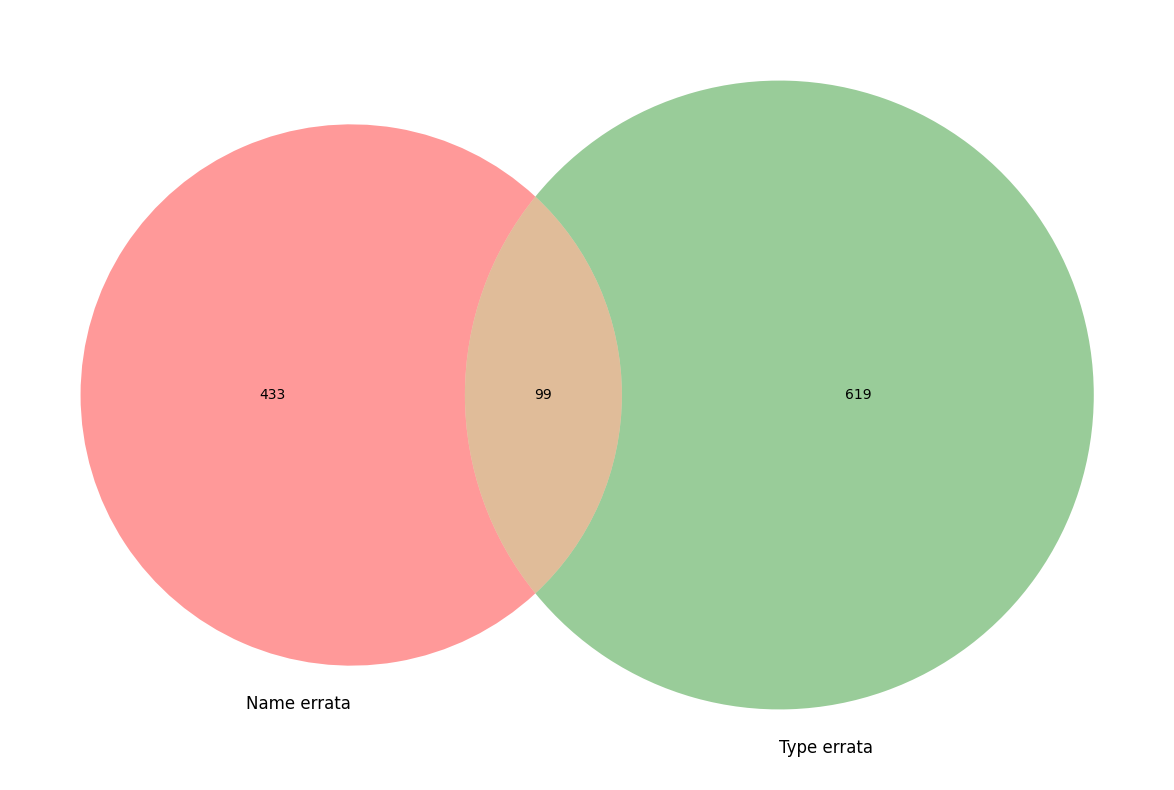

In [9]:
plt.figure(figsize=(20,10))
venn2(subsets = (name_only, type_only, both), set_labels = ('Name errata', 'Type errata'))
plt.show()